## 1.Importing of Libraries & CSV Files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.utils import resample
from scipy.stats import sem, t, norm
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
#Next, we can read the "Financial Transactions.csv" file into a Pandas DataFrame.
df = pd.read_csv("Customer-churn-records.csv")

#Seel the the dimensions of the DataFrame, we can use the `shape` attribute.
print("\nDataFrame Dimensions:")
print(f"Row count:{df.shape[0]}")
print(f"Attribute count:{df.shape[1]}")
print(" ")


#To print a small sample of the DataFrame data, we can use the `head()` method.
print("\nSample Data:")
display(df.head())


DataFrame Dimensions:
Row count:10000
Attribute count:18
 

Sample Data:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,NSW,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,QLD,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,NSW,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,NSW,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,QLD,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
## Delete column row number, since it just's just a row index and we don't need it for any further analysis
df.drop(columns=['RowNumber'], axis=1, inplace=True)

## 2. Data Understanding

In [4]:

## understand the data attributes, column types and and missing values
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          10000 non-null  int64  
 1   Surname             10000 non-null  object 
 2   CreditScore         10000 non-null  int64  
 3   Geography           10000 non-null  object 
 4   Gender              10000 non-null  object 
 5   Age                 10000 non-null  int64  
 6   Tenure              10000 non-null  int64  
 7   Balance             10000 non-null  float64
 8   NumOfProducts       10000 non-null  int64  
 9   HasCrCard           10000 non-null  int64  
 10  IsActiveMember      10000 non-null  int64  
 11  EstimatedSalary     10000 non-null  float64
 12  Exited              10000 non-null  int64  
 13  Complain            10000 non-null  int64  
 14  Satisfaction Score  10000 non-null  int64  
 15  Card Type           10000 non-null  object 
 16  Point

### We can see from the summary above that: 
#### 1. There are no attributies with null values, hence there is no need for any missing value treatment. 
#### 2. There are 4 categorical and 11 numerical variables. 

In [5]:

#Separate numerical and categorical variables to be able to do better analysis of each variables
# List the numerical columns
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("Numerical Columns:")
display(pd.DataFrame({'column':numerical_columns}))

# List the categorical columns
categorical_columns = df.select_dtypes(include=["object"]).columns.tolist()
print("\nCategorical Columns:")
display(pd.DataFrame({'column':categorical_columns}))


Numerical Columns:


,column
0,CustomerId
1,CreditScore
2,Age
3,Tenure
4,Balance
5,NumOfProducts
6,HasCrCard
7,IsActiveMember
8,EstimatedSalary
9,Exited



Categorical Columns:


,column
0,Surname
1,Geography
2,Gender
3,Card Type


In [6]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

Number of duplicate rows: 0


In [7]:
#checking the descriptive statistics
df.describe(include = 'all').T

# Even thought we have shown the descriptive statistics of all the variables, it is only sensible to look at the measures for continuous variables and attributes like satiscator score, and no. of products which are even though not continuous, it can give us some sense of produc holding and avg. satisfaction score of banks customer

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,NSW,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0
HasCrCard,10000.0,NaN,NaN,NaN,0.7055,0.45584,0.0,0.0,1.0,1.0,1.0


In [8]:
## look at the count of unique values of each columns to be able to analyse thing better

df.nunique()


CustomerId            10000
Surname                2932
CreditScore             460
Geography                 3
Gender                    2
Age                      70
Tenure                   11
Balance                6382
NumOfProducts             4
HasCrCard                 2
IsActiveMember            2
EstimatedSalary        9999
Exited                    2
Complain                  2
Satisfaction Score        5
Card Type                 4
Point Earned            785
dtype: int64

In [9]:
## Check for unique no. of values in categorical columns
print(f"Geography :{df['Geography'].unique()}")
print(f"Gender :{df['Gender'].unique()}")
print(f"Card Type :{df['Card Type'].unique()}")


### Surname, even though is a categorical value, it has a lot of unique values


# We can see from the data that columns ['NumOfProducts','HasCrCard','IsActiveMember','Exited','Complain','Satisfaction Score'] are not continuous. Hence, we have also checked for the unique values that they can take below
print(f"NumOfProducts :{df['NumOfProducts'].unique()}")
print(f"HasCrCard :{df['HasCrCard'].unique()}")
print(f"IsActiveMember :{df['IsActiveMember'].unique()}")
print(f"Exited :{df['Exited'].unique()}")
print(f"Complain :{df['Complain'].unique()}")
print(f"Satisfaction Score :{df['Satisfaction Score'].unique()}")

Geography :['NSW' 'QLD' 'VIC']
Gender :['Female' 'Male']
Card Type :['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']
NumOfProducts :[1 3 2 4]
HasCrCard :[1 0]
IsActiveMember :[1 0]
Exited :[1 0]
Complain :[1 0]
Satisfaction Score :[2 3 5 4 1]


## 3. Understanding Statistical Properties

In [10]:
## Measures of Central Tendency

## Looking at statistical measures like mean, median, mode and other percentiles doesn't make sense for all tha variables( for eamples categoricala and dummy varibles)
##Hence we have only selected variables where it makes sense to calculate such measures. For other variables we need to look at their univariate distrinbution

variables= ['Age','Tenure','Balance','NumOfProducts','Point Earned','EstimatedSalary','Satisfaction Score','CreditScore']

mean_values = df[variables].mean()
median_values = df[variables].median()
mode_values = df[variables].mode().iloc[0]
range_values = df[variables].max() - df[variables].min()
iqr_values = df[variables].quantile(0.75) - df[variables].quantile(0.25)
std_dev_values = df[variables].std()
pct_values = df[variables].quantile([0.25, 0.5, 0.75])
print("Mean Values:")
print(mean_values)
print("\nMedian Values:")
print(median_values)
print("\nMode Values:")
print(mode_values)
print("\nRange Values:")
print(range_values)
print("\nIQR Values:")
print(iqr_values)
print("\nStandard Deviation Values:")
print(std_dev_values)
print("\nPercentile Values:")
print(pct_values)

Mean Values:
Age                       38.921800
Tenure                     5.012800
Balance                76485.889288
NumOfProducts              1.530200
Point Earned             606.515100
EstimatedSalary       100090.239881
Satisfaction Score         3.013800
CreditScore              650.528800
dtype: float64

Median Values:
Age                       37.000
Tenure                     5.000
Balance                97198.540
NumOfProducts              1.000
Point Earned             605.000
EstimatedSalary       100193.915
Satisfaction Score         3.000
CreditScore              652.000
dtype: float64

Mode Values:
Age                      37.00
Tenure                    2.00
Balance                   0.00
NumOfProducts             1.00
Point Earned            408.00
EstimatedSalary       24924.92
Satisfaction Score        3.00
CreditScore             850.00
Name: 0, dtype: float64

Range Values:
Age                       74.00
Tenure                    10.00
Balance               25

In [11]:
#checking the univariable distribution of the variables which are not continuous or is categorical in nature
churn_cnt = df.groupby(['Exited']).size() 
print(churn_cnt)

Exited
0    7962
1    2038
dtype: int64


## 4. Visualisations and Charts

Age
Skew : 1.01


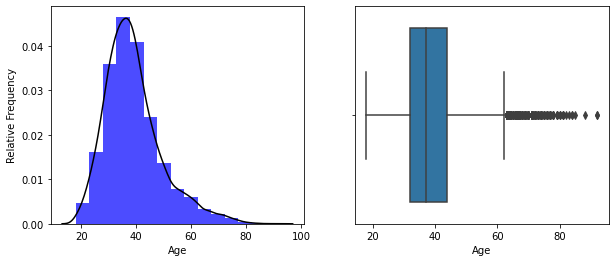

Tenure
Skew : 0.01


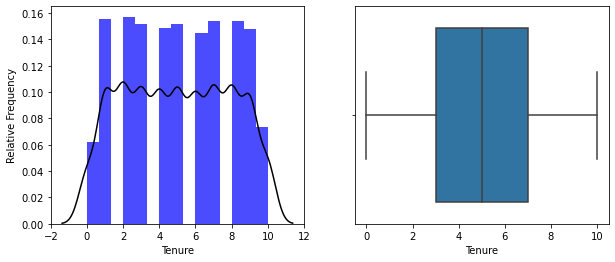

Balance
Skew : -0.14


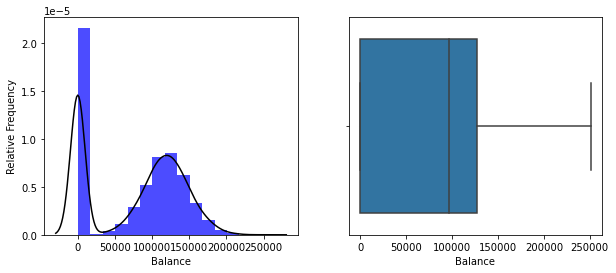

Point Earned
Skew : 0.01


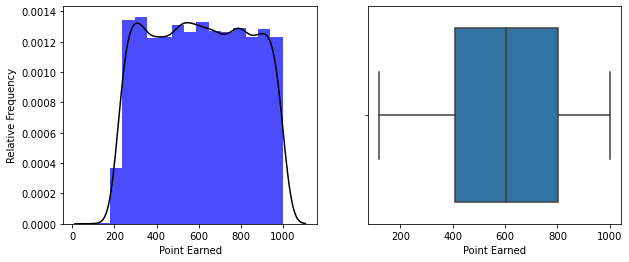

EstimatedSalary
Skew : 0.0


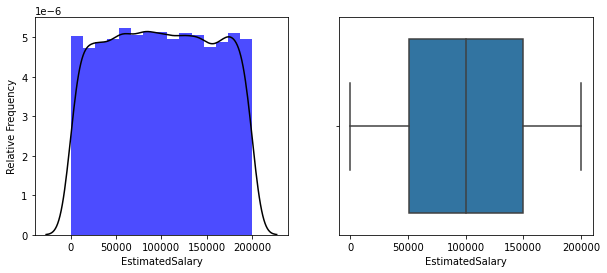

CreditScore
Skew : -0.07


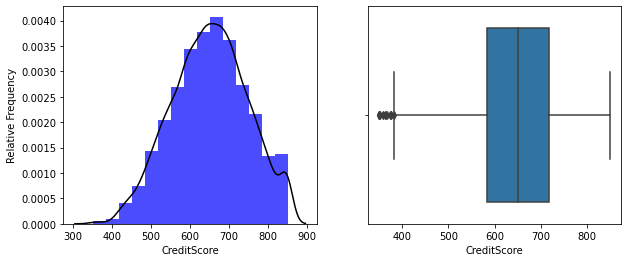

In [12]:
## Histograms for continuous variables only

variables= ['Age','Tenure','Balance','Point Earned','EstimatedSalary','CreditScore']

df_cont = df[variables]

## Univariate analysis for the numerical variables

for col in df_cont:
    print(col)
    print('Skew :', round(df_cont[col].skew(),2))
    plt.figure(figsize = (10,4))
    plt.subplot(1,2,1)
    plt.hist(df_cont[col],bins=15,color = 'blue', density = True, alpha = 0.7)
    sns.kdeplot(df_cont[col], color="black", fill=False)
    plt.ylabel('Relative Frequency')
    plt.subplot(1,2,2)
    sns.boxplot(x=df_cont[col])
    plt.show()




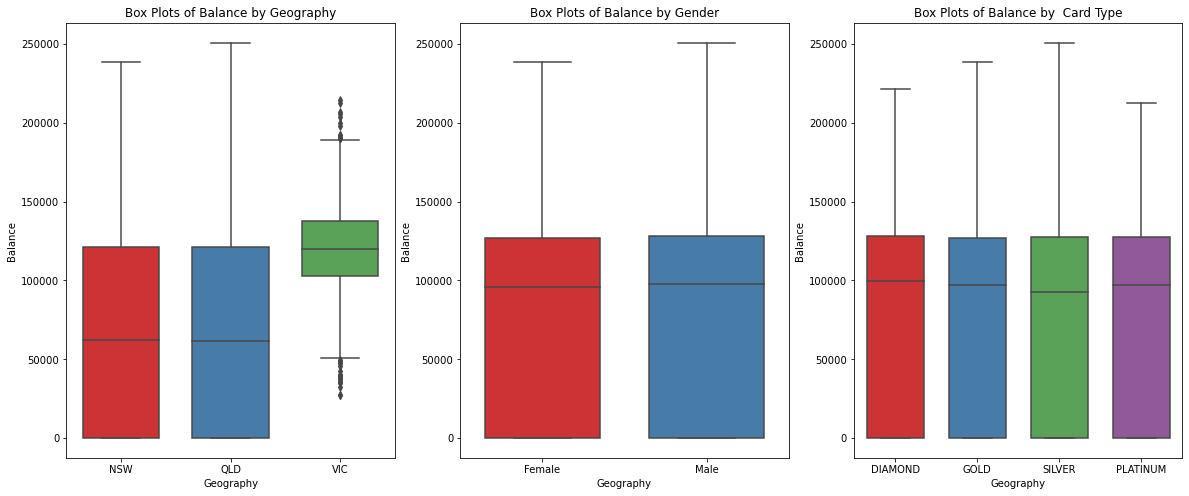

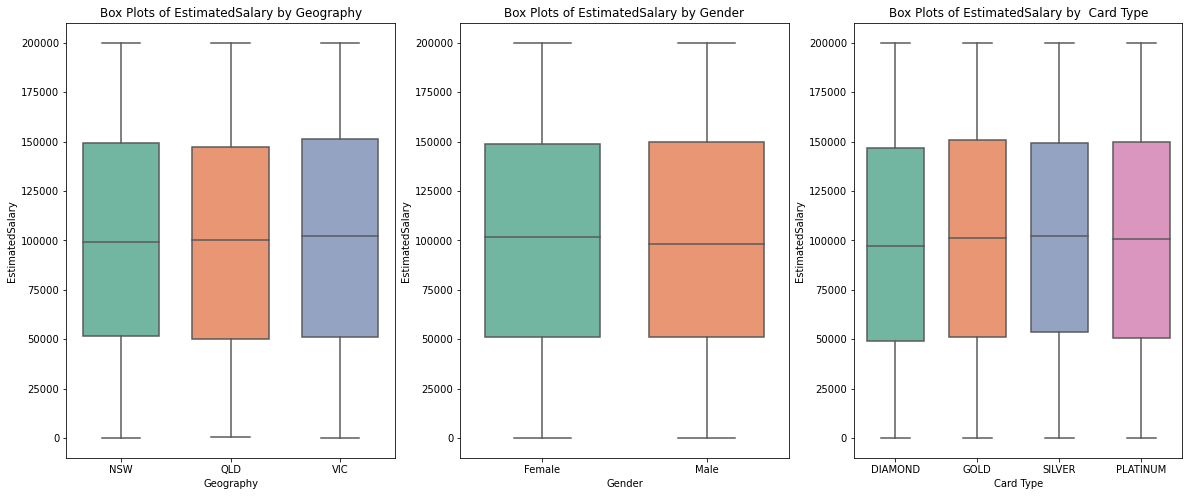

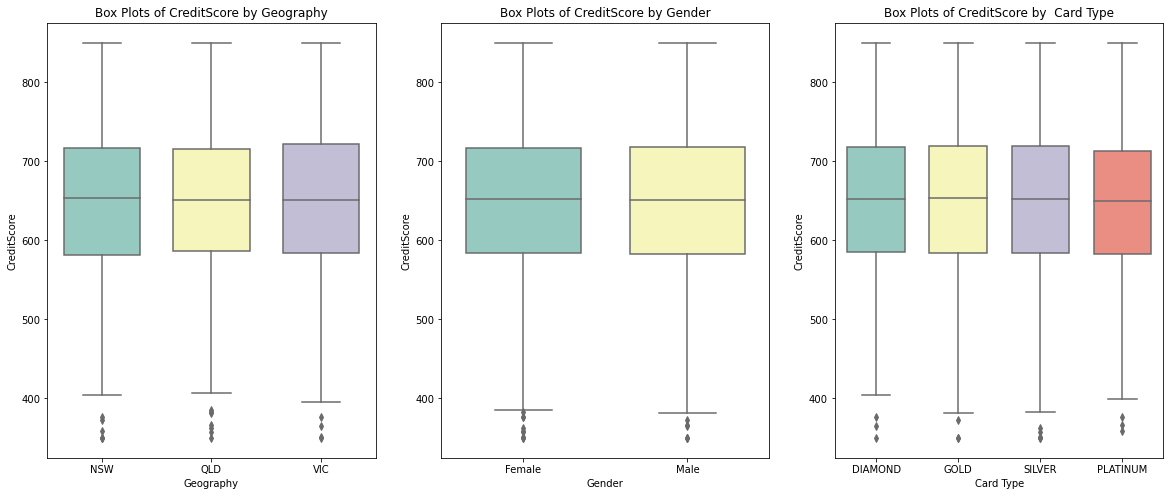

In [15]:
## Create Boxplots for combinations of continuous and categorical variables


## 1 . Looking at account balances wr.t. geographuy, gender and Cars Type
plt.figure(figsize=(20, 8))
plt.subplot(1,3,1)
sns.boxplot(x='Geography', y='Balance', data=df, width=0.7, palette='Set1')
plt.title("Box Plots of Balance by Geography")
plt.xlabel("Geography")
plt.ylabel("Balance")

plt.subplot(1,3,2)
sns.boxplot(x='Gender', y='Balance', data=df, width=0.7, palette='Set1')
plt.title("Box Plots of Balance by Gender")
plt.xlabel("Geography")
plt.ylabel("Balance")

plt.subplot(1,3,3)
sns.boxplot(x='Card Type', y='Balance', data=df, width=0.7, palette='Set1')
plt.title("Box Plots of Balance by  Card Type")
plt.xlabel("Geography")
plt.ylabel("Balance")
plt.show()



## 2 . Looking at Estimated Salary wr.t. geographuy, gender and Cars Type
plt.figure(figsize=(20, 8))
plt.subplot(1,3,1)
sns.boxplot(x='Geography', y='EstimatedSalary', data=df, width=0.7, palette='Set2')
plt.title("Box Plots of EstimatedSalary by Geography")
plt.xlabel("Geography")
plt.ylabel("EstimatedSalary")

plt.subplot(1,3,2)
sns.boxplot(x='Gender', y='EstimatedSalary', data=df, width=0.7, palette='Set2')
plt.title("Box Plots of EstimatedSalary by Gender")
plt.xlabel("Gender")
plt.ylabel("EstimatedSalary")

plt.subplot(1,3,3)
sns.boxplot(x='Card Type', y='EstimatedSalary', data=df, width=0.7, palette='Set2')
plt.title("Box Plots of EstimatedSalary by  Card Type")
plt.xlabel("Card Type")
plt.ylabel("EstimatedSalary")
plt.show()


## 3 . Looking at Credit Score wr.t. geographuy, gender and Cars Type
plt.figure(figsize=(20, 8))
plt.subplot(1,3,1)
sns.boxplot(x='Geography', y='CreditScore', data=df, width=0.7, palette='Set3')
plt.title("Box Plots of CreditScore by Geography")
plt.xlabel("Geography")
plt.ylabel("CreditScore")

plt.subplot(1,3,2)
sns.boxplot(x='Gender', y='CreditScore', data=df, width=0.7, palette='Set3')
plt.title("Box Plots of CreditScore by Gender")
plt.xlabel("Gender")
plt.ylabel("CreditScore")

plt.subplot(1,3,3)
sns.boxplot(x='Card Type', y='CreditScore', data=df, width=0.7, palette='Set3')
plt.title("Box Plots of CreditScore by  Card Type")
plt.xlabel("Card Type")
plt.ylabel("CreditScore")
plt.show()




## 5. Correlation matrix and Scatterplots

<Figure size 936x1224 with 0 Axes>

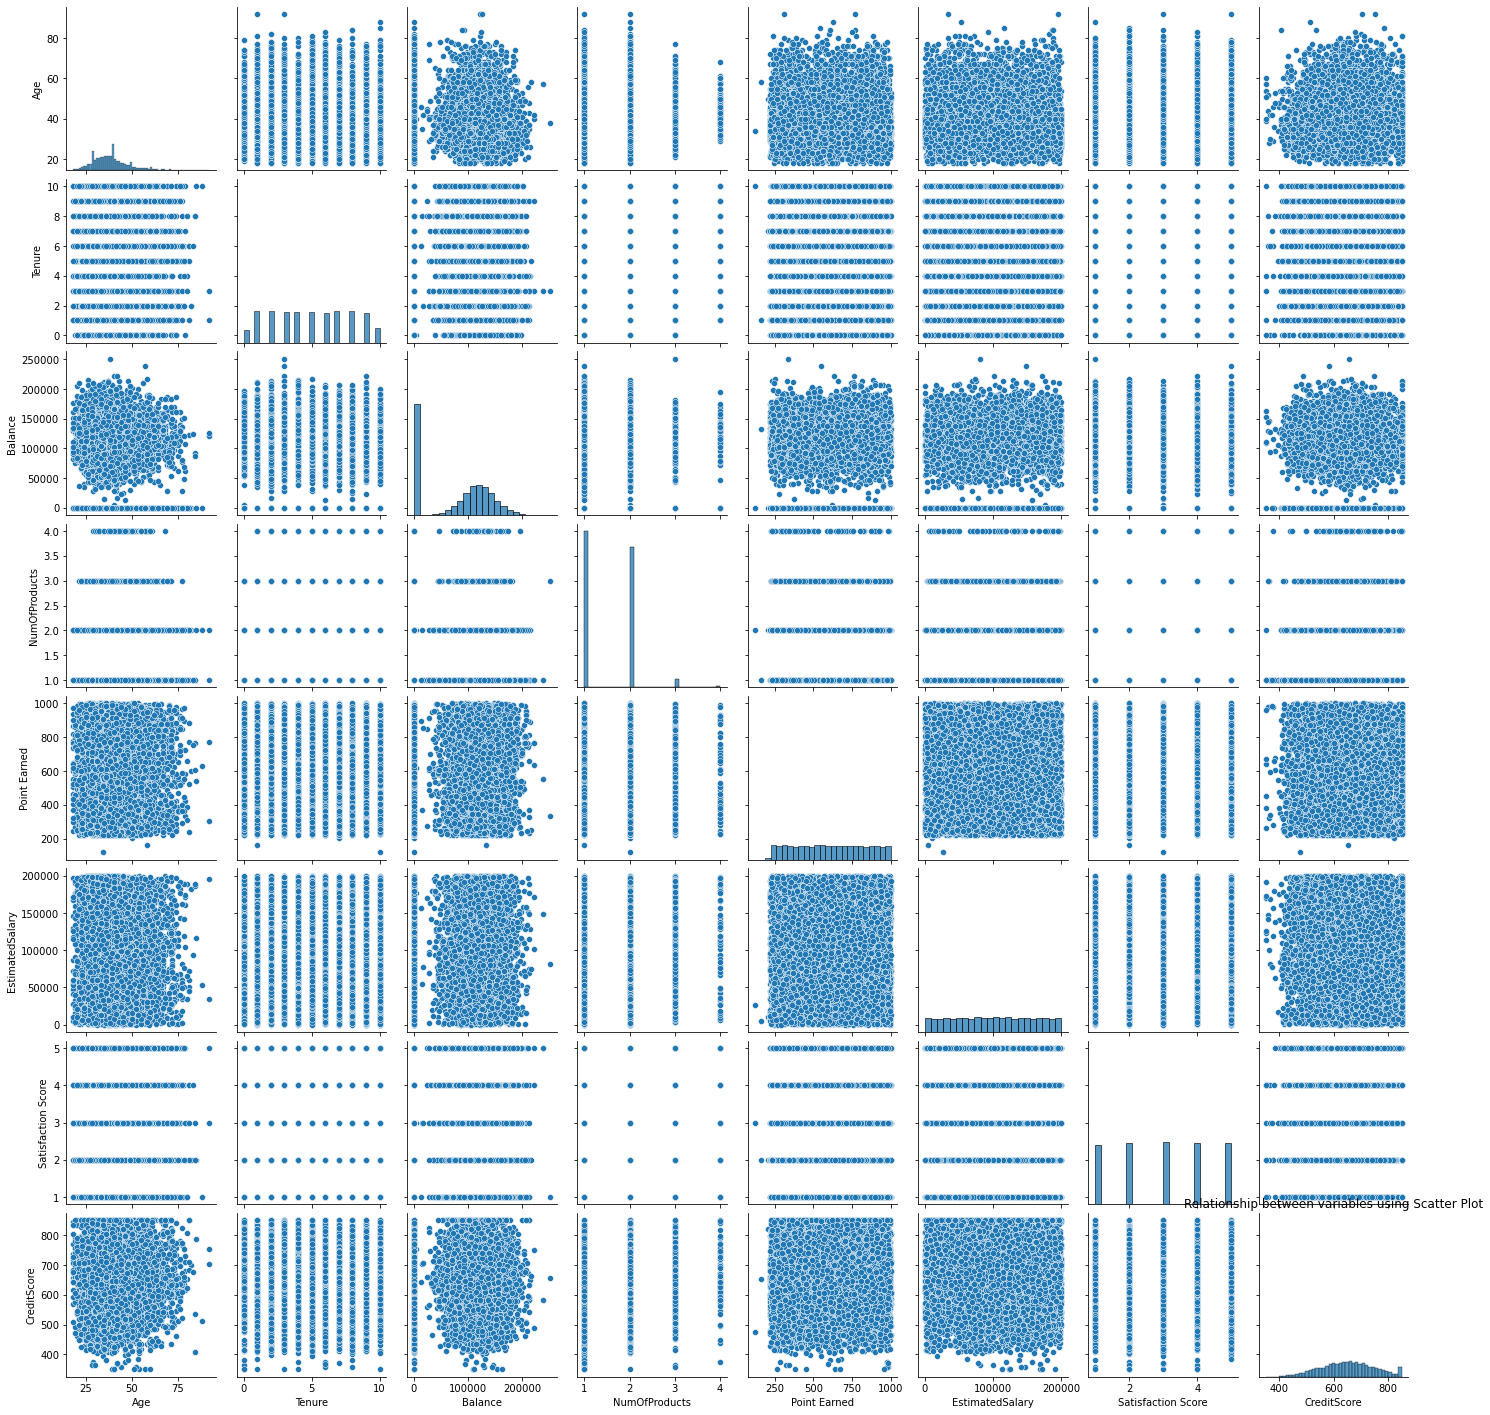

                         Age    Tenure   Balance  NumOfProducts  Point Earned  \
Age                 1.000000 -0.009997  0.028308      -0.030680      0.002222   
Tenure             -0.009997  1.000000 -0.012254       0.013444     -0.010196   
Balance             0.028308 -0.012254  1.000000      -0.304180      0.014608   
NumOfProducts      -0.030680  0.013444 -0.304180       1.000000     -0.015330   
Point Earned        0.002222 -0.010196  0.014608      -0.015330      1.000000   
EstimatedSalary    -0.007201  0.007784  0.012797       0.014204     -0.001515   
Satisfaction Score -0.000876  0.008663 -0.002588      -0.011394     -0.014400   
CreditScore        -0.003965  0.000842  0.006268       0.012238      0.000077   

                    EstimatedSalary  Satisfaction Score  CreditScore  
Age                       -0.007201           -0.000876    -0.003965  
Tenure                     0.007784            0.008663     0.000842  
Balance                    0.012797           -0.002588  

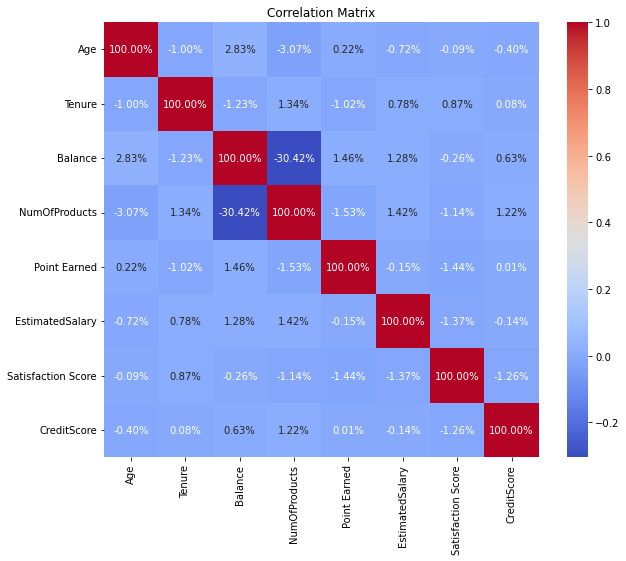

In [16]:
# relationship between continuous variables and also their relationship with the target variable i.e Rating
# Bivariate relationship between continuous variables
# Pairplot

variables= ['Age','Tenure','Balance','NumOfProducts','Point Earned','EstimatedSalary','Satisfaction Score','CreditScore']
df_corr = df[variables]
plt.figure(figsize = (13,17))
sns.pairplot(df_corr)
plt.title('Relationship between variables using Scatter Plot')
plt.show()

# Heatmap and  to check correlation between numeric variables 
correlation_matrix = df_corr.corr()
print(correlation_matrix)

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(correlation_matrix,annot = True,vmax = 1,fmt=".2%",square = True, cmap = "coolwarm", ax=ax)
plt.title('Correlation Matrix')
plt.show()

## 6.Bootstapping

In [17]:
# Bootstrapping
# Bootstrapping is a resampling technique used to estimate statistics on a population by sampling a dataset with replacement.
# This allows us to assess the variability of our sample statistics and build confidence intervals.
# We can use the `resample()` method from `sklearn`
bootstrap_sample = resample(df, replace=True, n_samples=1000)
print("\nbootstrap_sample Dimensions:")
print(f"Row count:{bootstrap_sample.shape[0]}")
print(f"Attribute count:{bootstrap_sample.shape[1]}")
print(" ")
#To print a small sample of the DataFrame data, we can use the `head()` method.
print("\nbootstrap_sample Data:")
display(bootstrap_sample.head())


bootstrap_sample Dimensions:
Row count:1000
Attribute count:17
 

bootstrap_sample Data:


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
1266,15749050,Justice,548,NSW,Female,36,3,0.00,1,1,0,65996.90,0,0,5,SILVER,409
7055,15621546,Yuriev,620,NSW,Female,33,9,127638.35,1,1,1,192717.57,0,0,2,DIAMOND,466
9118,15804052,Scott,710,QLD,Male,23,6,0.00,2,1,1,134188.11,0,0,4,SILVER,416
5281,15620372,Cross,687,QLD,Male,31,3,0.00,2,0,0,48228.10,0,0,2,PLATINUM,575
4465,15579914,Garcia,633,VIC,Male,30,2,109786.82,2,1,1,139712.81,0,0,2,PLATINUM,778


In [18]:
# Calculate the mean and standard deviation of the original 'balance' column
original_mean = df['Balance'].mean()
original_std = df['Balance'].std()

# Creating bootstrap samples and calculating mean for each sample
bootstrap_means = []
for _ in range(1000):
    bootstrap_sample = resample(df['Balance'], replace=True, n_samples=500)
    bootstrap_means.append(np.mean(bootstrap_sample))

# Calculate the mean and standard deviation of the bootstrap means
bootstrap_mean_of_means = np.mean(bootstrap_means)
bootstrap_std_of_means = np.std(bootstrap_means)

# Compare with the original statistics
print(f"Original Mean for balance: {original_mean:.2f}, Original Standard Deviation for balance: {original_std:.2f}")
print(f"Bootstrap Mean of Means for balance: {bootstrap_mean_of_means:.2f}, Bootstrap Standard Deviation of Means for balance: {bootstrap_std_of_means:.2f}")
print( " ")

#shows that bootstrapped sample means show less variability; centered around true population mean
#Standard deviation shows high difference between the original and bootstrapped sample, and the bootstapped SD is considerably lesser thereby exhibiting less variablity


## Calculate the mean and standard deviation of the original 'CreditScore' column
original_mean = df['CreditScore'].mean()
original_std = df['CreditScore'].std()

# Creating bootstrap samples and calculating mean for each sample
bootstrap_means = []
for _ in range(1000):
    bootstrap_sample = resample(df['CreditScore'], replace=True, n_samples=500)
    bootstrap_means.append(np.mean(bootstrap_sample))

# Calculate the mean and standard deviation of the bootstrap means
bootstrap_mean_of_means = np.mean(bootstrap_means)
bootstrap_std_of_means = np.std(bootstrap_means)

# Compare with the original statistics
print(f"Original Mean for credit score: {original_mean:.2f}, Original Standard Deviation: for credit score {original_std:.2f}")
print(f"Bootstrap Mean of Means for credit score: {bootstrap_mean_of_means:.2f}, Bootstrap Standard Deviation of Means for credit score: {bootstrap_std_of_means:.2f}")

#shows that bootstrapped sample means show less variability; centered around true population mean
#Standard deviation shows high difference between the original and bootstrapped sample, and the bootstapped SD is considerably lesser thereby exhibiting less variablity

Original Mean for balance: 76485.89, Original Standard Deviation for balance: 62397.41
Bootstrap Mean of Means for balance: 76498.33, Bootstrap Standard Deviation of Means for balance: 2748.52
 
Original Mean for credit score: 650.53, Original Standard Deviation: for credit score 96.65
Bootstrap Mean of Means for credit score: 650.70, Bootstrap Standard Deviation of Means for credit score: 4.29


## 7. Hypothesis Testing

T-Statistic: -12.879220947122318
P-Value: 9.552440618300739e-36
Reject the null hypothesis. There is evidence that customers more than 50 years old have a lower likelihood of churning.


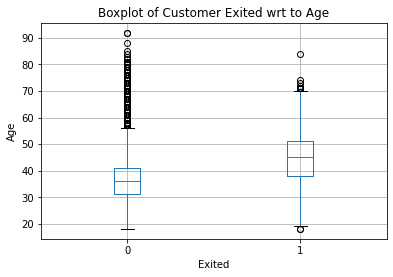

In [19]:
## Age and Customer Churn


#Hypthesis Formulation for understanding if age and likeluhood of churning are related
#h0: No evidence of customers with age more than 50 years old having lower likelihood of churning
#h1: Customers of age more than 50 years old have a lower likelihood of churning


# Filter the DataFrame for customers who are more than 50 years old and left the bank
left_df = df[(df['Exited'] == 1) & (df['Age'] > 50)]

# Filter the DataFrame for customers who are more than 50 years old and stayed with the bank
stay_df = df[(df['Exited'] == 0) & (df['Age'] > 50)]

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(left_df['Age'], stay_df['Age'])

# Set the significance level
alpha = 0.05

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence that customers more than 50 years old have a lower likelihood of churning.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence that customers more than 50 years old have a lower likelihood of churning.")


##Let us see a simple box plot using pandas to validate the hypothesis testing result
# We will use `matplotlib` to do that

# Create a biased sample
biased_sample = df[df['Age'] > 10]

# Create a boxplot
biased_sample.boxplot(column='Age', by='Exited')

# Set the title and labels
plt.title('Boxplot of Customer Exited wrt to Age')
plt.suptitle('') 
plt.xlabel('Exited')
plt.ylabel('Age')

# Display the plot
plt.show()

# the boxplot result gives evidence that older customers have less likelihood of churning


T-Statistic: 0.16813040821955672
P-Value: 0.8664916059217915
Fail to reject the null hypothesis. There is no significant evidence that customers with a credit score greater than 700 have an impact on churn.


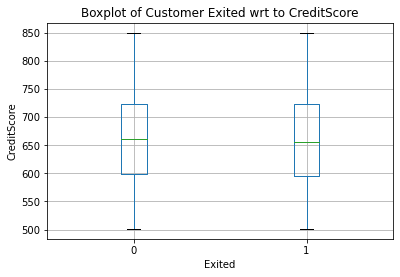

In [20]:
## Customer Churn and  Credit Score

# Filter the DataFrame for customers with a credit score greater than 700 and left the bank
left_df = df[(df['Exited'] == 1) & (df['CreditScore'] > 700)]

# Filter the DataFrame for customers with a credit score greater than 700 and stayed with the bank
stay_df = df[(df['Exited'] == 0) & (df['CreditScore'] > 700)]
# 
# Perform the t-test
t_statistic, p_value = stats.ttest_ind(left_df['CreditScore'], stay_df['CreditScore'])

# Set the significance level
alpha = 0.05

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence that customers with a credit score greater than 700 have an impact on churn.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence that customers with a credit score greater than 700 have an impact on churn.")


#Let us see a simple box plot using pandas to validate the hypothesis testing result
# We will use `matplotlib` to do that

# Create a biased sample
biased_sample = df[df['CreditScore'] > 500]

# Create a boxplot
biased_sample.boxplot(column='CreditScore', by='Exited')

# Set the title and labels
plt.title('Boxplot of Customer Exited wrt to CreditScore')
plt.suptitle('') 
plt.xlabel('Exited')
plt.ylabel('CreditScore')

# Display the plot
plt.show()

# the boxplot result does not give evidence that customers with a credit score of more than 500 have less likelihood of churning


T-Statistic: -1.2548998618223046
P-Value: 0.2095762472898497
Fail to reject the null hypothesis. There is no significant evidence that the customers with balance>$100000 have less likelihood of churning.


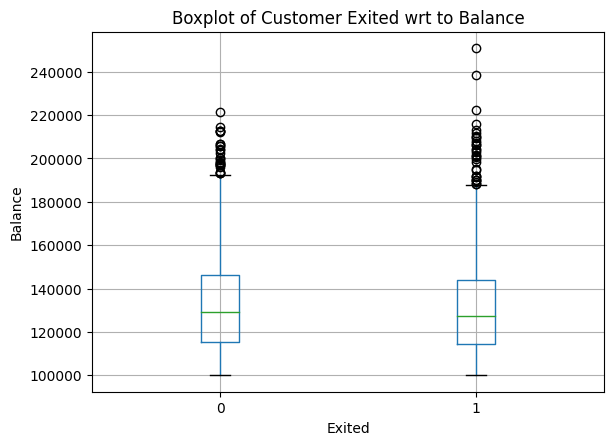

In [69]:
## Customer Churn and Balances

#Hypothesis Formulation:
#H0: No evidence that customers having balance>$100000 have lower likelihood of churning
#H1: Customers with balance>$100000 have lower likelihood of churning


# Filter the DataFrame for customers with a balance more than a certain threshold
threshold = 100000
lower_balance_df = df[df['Balance'] > threshold]

# Filter the DataFrame for customers who left the bank
left_df = lower_balance_df[lower_balance_df['Exited'] == 1]

# Filter the DataFrame for customers who stayed with the bank
stay_df = lower_balance_df[lower_balance_df['Exited'] == 0]

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(left_df['Balance'], stay_df['Balance'])

# Set the significance level
alpha = 0.05

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence that the customers with balance>$100000 have less likelihood of churning.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence that the customers with balance>$100000 have less likelihood of churning.")



#Let us see a simple box plot using pandas to validate the hypothesis testing result
# We will use `matplotlib` to do that

# Create a biased sample
biased_sample = df[df['Balance'] > 100000]

# Create a boxplot
biased_sample.boxplot(column='Balance', by='Exited')

# Set the title and labels
plt.title('Boxplot of Customer Exited wrt to Balance')
plt.suptitle('') 
plt.xlabel('Exited')
plt.ylabel('Balance')

# Display the plot
plt.show()

# the boxplot result does not give evidence that customers with balance>$100000 have less likelihood of churning, as in case of customers who have churned, they had high balances
